# [Introduction to Data Science: A Comp-Math-Stat Approach](https://lamastex.github.io/scalable-data-science/as/2019/)
## 1MS041, 2020 
&copy;2020 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# 12. Linear Regression

- Regression 
  - linear models and their least-squares estimators
  - assessing fit using diagnostic plots (residual analysis)
  - multiple linear regression - not covered in detail and won't be on exam
  - prediction; not covered - not covered and won't be on exam
  - prelude to statistical ML - not covered and won't be on exam
- Introduction to R in SageMath Jupyter IPython Notebook - SageMath/R


# Introduction
**Regression** is a method for studying the relationship between a **response variable** $Y$ and a **covariate** $X$. 
The covariate is also called a **feature** or a **predictor** variable.

A simple way to summarise the relationship between $X$ and $Y$ is through the regression function $r(x)$:

$$
r(x) = E(Y | X=x) = \int y \, f(y|x) dy
$$

Our objective is to estimate the regression function $r(x)$ from data of the form:

$$
(Y_1,X_1),(Y_2,X_2),\ldots,(Y_n,X_n) \overset{IID}{\sim} F_{X,Y}
$$

We assume that $F_{X,Y}$, the joint distribution of $X$ and $Y$, is parametric and $r$ is linear.

# Simple Linear Regression

The **simple linear regression model** is when $X_i$ is real-valued (one-dimensional) and $r(x)$ is assumed to be linear:

$$
r(x) = \beta_0 + \beta_1 x, \qquad \text{and } \quad V(Y | X=x)=\sigma^2 \, \text{ is independent of } x
$$

Thus simple linear regression model is the following:

$$
\boxed{
Y_i = \beta_0 + \beta_1 X_i + \epsilon_i, \qquad \text{ where, } \quad E(\epsilon_i | X_i)=0 \text{ and } V(\epsilon_i | X_i)=\sigma^2
}
$$

The unknown parameters and their estimates in the model are:

- the intercept $\beta_0$ and its estimate $\widehat{\beta}_0$,
- the slope $\beta_1$ and its estimate $\widehat{\beta}_1$ and
- the variance $\sigma^2$ and its estimate $\widehat{\sigma}^2$

The **fitted line** is:
$$
\widehat{r}(x) = \widehat{\beta}_0 + \widehat{\beta}_1 x
$$

The **fitted or predicted values** are:
$$
\widehat{Y}_i = \widehat{r}(X_i) 
$$

The **residuals** are:
$$
\widehat{\epsilon}_i = Y_i-\widehat{Y}_i=Y_i-\left(\widehat{\beta}_0 + \widehat{\beta}_1 X_i\right)
$$

The **residual sum of squares** or **RSS**, that measures how well the line fits the data, is defined by
$$
RSS = \sum_{i=1}^n \widehat{\epsilon}_i^2
$$

The **least squares estimates** are the values $\widehat{\beta}_0$ and $\widehat{\beta}_1$ that minimise $RSS$ and they are given by:

$$
\boxed{
\widehat{\beta}_1 = \displaystyle{\frac{\sum_{i=1}^n(X_i-\overline{X}_n)(Y_i-\overline{Y}_n)}{\sum_{i=1}^n(X_i-\overline{X}_n)^2}}
\, , \qquad
\widehat{\beta}_0 = \displaystyle{\overline{Y}_n - \widehat{\beta}_1 \overline{X}_n}
\, , \qquad 
\widehat{\sigma}^2 = \displaystyle{\left(\frac{1}{n-2}\right) \sum_{i=1}^n \widehat{\epsilon}_i^2}
}
$$

## Interactive Animations for Regression

Check out:
- [http://setosa.io/ev/ordinary-least-squares-regression/](http://setosa.io/ev/ordinary-least-squares-regression/)

# Least Squares and Maximum Likelihood

Suppose we add the assumption about the model's noise that 

$$\boxed{\displaystyle{\epsilon_i | X_i \sim Normal(0,\sigma^2) \quad \text{ i.e., }\quad Y_i|X_i \sim Normal(\mu_i,\sigma^2), \quad \text{ where } \quad \mu_i = \beta_0+\beta_1 X_i }}$$

Then, the likelihood function is:

$$
\begin{align}
\displaystyle{\prod_{i=1}^n f(X_i,Y_i)} \,
&= \displaystyle{\prod_{i=1}^n f_X(X_i) \, f_{Y|X}(Y_i|X_i)}\\ 
&= \displaystyle{\prod_{i=1}^n f_X(X_i) \, \prod_{i=1}^n f_{Y|X}(Y_i|X_i)}\\
&=: L_{n,X} \, L_{n,Y|X}
\end{align}
$$

where, $L_{n,X}:=\prod_{i=1}^n f_X(X_i)$ is the marginal likelihood of $X_1,\ldots,X_n$ that does not depend on the parameters $(\beta_0,\beta_1,\sigma)$, and $L_{n,Y|X}:=\prod_{i=1}^n f_{Y|X}(Y_i|X_i)$ is the *conditional likelihood* that does depend on the parameters. Therefore the likelihood function is given by the conditional likelihood:

$$
\begin{align}
L(\beta_0,\beta_1,\sigma) \quad
&\propto \quad \displaystyle{\prod_{i=1}^n f(X_i,Y_i)}  \\
&\propto \quad L_{n,Y|X}  = \displaystyle{\prod_{i=1}^n f_{Y|X}(Y_i|X_i)}\\
&\propto \quad \displaystyle{\sigma^{-n} \exp\left(-\frac{1}{2 \sigma^2}\sum_{i=1}^n\left(Y_i-\mu_i\right)^2 \right)}\\
\end{align}
$$

and the conditional log-likelihood is:

$$
\boxed{
l(\beta_0,\beta_1,\sigma) \quad =\quad \displaystyle{-n \log(\sigma) -\frac{1}{2 \sigma^2} \sum_{i=1}^n\left(Y_i-\mu_i\right)^2 }
}
$$

To find the MLE of $(\beta_0,\beta_1)$ we need to maximise $\ell(\beta_0,\beta_1,\sigma)$ for a given $\sigma$. From the above expresion it is clear that maximising the log-likelihood is equivalent to minimising the *residual sum of squares* or *RSS* given by

$$
\boxed{
\sum_{i=1}^n\left(Y_i-\mu_i\right)^2
}
$$

Therefore, we have shown the following Theorem.

### Theorem [MLE is LSE] 

> Under the assumption of normally distributed noise, the maximum likelihood estimator (MLE) is the least squares estimator (LSE).

We can maximise $l(\beta_0,\beta_1,\sigma)$ over $\sigma$ and obtain the MLE for $\sigma$ as follows:

$$
\widehat{\sigma}^2  =  \frac{1}{n} \sum_{i=1}^n \ \widehat{\epsilon}^2 \, .
$$

But it is more common in practise to use the unbiased estimator, with $E(\widehat{\sigma}^2)=\sigma^2$, that we saw earlier for sample size $n>2$:

$$
\widehat{\sigma}^2 = \displaystyle{\left(\frac{1}{n-2}\right) \sum_{i=1}^n \widehat{\epsilon}_i^2} \, .
$$

## Properties of the Least Squares Estimator (LSE)

It's finally time to obtain the standard errors and limititng distribution of the least quares estimator (also the MLE).

In regression we are interested in the properties of the estimators conditional on the covariates 

$$X_{1:n}:= (X_1,X_2,\ldots,X_n)$$

### Conditional Mean and Variance of LSE

Let $\widehat{\beta}^T=(\widehat{\beta}_0,\widehat{\beta}_1)^T$ denote the least squares estimators (which is also the MLE). Then

$$
\begin{align}
E \left(\widehat{\beta} \, | \, X_{1:n} \right) 
&=  \displaystyle{\left( {\begin{array}{c}
   \beta_0 \\
   \beta_1 \\
  \end{array} } \right)}\\
V \left(\widehat{\beta} \, | \, X_{1:n} \right) 
&= \displaystyle{\frac{\sigma^2}{n s_X^2} 
\left( {\begin{array}{cc}
   \frac{1}{n}\sum_{i=1}^n X_i^2 & -\overline{X}_n \\
   -\overline{X}_n & 1\\
  \end{array} } \right)}
\end{align}
$$

where, 

$$
s_X^2 = \frac{1}{n} \sum_{i=1}^n \left(X_i -\overline{X}_n\right)^2
$$

### Estimated Standard Errors

The estimated standard errors for $\widehat{\beta}_0$ and $\widehat{\beta}_1$, or more precisely, the estimated standard errors conditional on the covariates, are given by the square-root of the diagonal terms of the variance-covariance matrix $V \left(\widehat{\beta} \, | \, X_{1:n} \right) $ and substituting the estimate $\widehat{\sigma}$ for $\sigma$, as follows:

$$
\begin{align}
\widehat{se}\left(\widehat{\beta}_0\right) := \widehat{se}\left(\widehat{\beta}_0 \, | \, X_{1:n} \right) \, 
&= \, \frac{\widehat{\sigma}}{s_X \sqrt{n}} \sqrt{\frac{\sum_{i=1}^nX_i^2}{n}}\\
\widehat{se}\left(\widehat{\beta}_1\right) := \widehat{se}\left(\widehat{\beta}_0 \, | \, X_{1:n}\right) \, 
&= \, \frac{\widehat{\sigma}}{s_X \sqrt{n}}
\end{align}
$$

Thus under appropriate modeling assumptions in simple leinear regression we have the following four properties.

### Four Asymptotic Properties of the LSE

#### 1. Asymptotic Consistency

As $n \to \infty$, the LSE, i.e. $\widehat{\beta}_0$ and $\widehat{\beta}_1$, converges in probability to the parameters, i.e., $\beta_0,\beta_1$, generating the data $(Y_1,X_1),(Y_2,X_2),\ldots,(Y_n,X_n)$ as summarised below.

$$
\boxed{
\widehat{\beta}_0 \overset{P}{\to} \beta_0 \quad \text{ and } \quad \widehat{\beta}_1 \overset{P}{\to} \beta_1
}
$$

#### 2. Asymptotic Normality

As $n \to \infty$, the LSE, i.e. $\widehat{\beta}_0$ and $\widehat{\beta}_1$, converges in distribution to the parameters, i.e., $\beta_0,\beta_1$, generating the data $(Y_1,X_1),(Y_2,X_2),\ldots,(Y_n,X_n)$ as summarised below.

$$
\boxed{
\frac{\widehat{\beta}_0 - \beta_0}{\widehat{se}\left(\widehat{\beta}_0\right)} \overset{d}{\to} Normal(0,1) \quad \text{ and } \quad \frac{\widehat{\beta}_1 - \beta_1}{\widehat{se}\left(\widehat{\beta}_1\right)} \overset{d}{\to} Normal(0,1) 
}
$$

#### 3. Approximate $1-\alpha$ Confidence Interval

The $1-\alpha$ confidence interval for $\beta_0$ and $\beta_1$ that is obtained from the approximately normal distribution as $n$ gets large is:

$$
\boxed{
\widehat{\beta}_0 \, \pm \, z_{\alpha/2} \, \widehat{se}\left(\widehat{\beta}_0\right) \quad \text{ and } \quad
\widehat{\beta}_1 \, \pm \, z_{\alpha/2} \, \widehat{se}\left(\widehat{\beta}_1\right) 
}
$$

#### 4. The Wald Test

Recall Wald test statistic for testing the null hypothesis with the null value $\beta^{(0)}$:

$$
H_0: \beta = \beta^{(0)} \quad \text{ versus } \quad H_1: \beta \neq \beta^{(0)} \quad { is } \quad W = \frac{\left(\widehat{\beta}-\beta^{(0)}\right)}{\widehat{se}\left(\widehat{\beta}\right)}
$$

Thus the Wald test for testing $H_0: \beta_1=0$ versus $H_1: \beta_1 \neq 0$ is to 
reject $H_0$ if $|W| > z_{\alpha/2}$ where $W=\frac{\widehat{\beta}_1}{\widehat{se}\left(\widehat{\beta}_1\right)}$.

# Implementing Simple Linear Regression from Scratch

Using the above formulas we can implement Python functions to calculate the **least squares estimates**,
$\widehat{\beta}_0$ and $\widehat{\beta}_1$, that minimise $RSS$.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

def estimate_coefficients(x, y): 
    # size of the dataset  
    n = np.size(x) 
    # mean of x and y
    mean_x, mean_y = np.mean(x), np.mean(y) 
    # xy cross-deviation and xx deviation
    SS_xy = np.sum(y*x - n*mean_y*mean_x) 
    SS_xx = np.sum(x*x - n*mean_x*mean_x)  
    # calculating LSE of regression coefficients 
    b1_hat = SS_xy / SS_xx 
    b0_hat = mean_y - b1_hat*mean_x 
    sigma_hat2 = np.mean((y - (b0_hat + b1_hat * x))^2)
    if n>2:
        sigma_hat2 = sigma_hat2*n/(n-2)
    sigma_hat=np.sqrt(sigma_hat2)
    return(b0_hat, b1_hat, sigma_hat)

def standard_errors(x,y):
    n = np.size(x) 
    b0_hat,b1_hat,s_hat = estimate_coefficients(x,y)
    mean_x = np.mean(x)
    s2X = np.mean( (x-mean_x)^2 )
    se_b1 = s_hat/np.sqrt(s2X*n)
    se_b0 = se_b1*np.sqrt(np.mean(x^2))
    return (se_b0, se_b1)

def plot_regression_line(x, y, b): 
    # plotting the data points on a graph
    plt.scatter(x, y, color = "m",marker = "o", s = 10) 
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
    # plotting the fitted regression line
    plt.plot(x, y_pred, color = "b")
    # putting generic labels for x and y axis
    plt.xlabel('x') 
    plt.ylabel('y') 
    # function to show plotted graph
    plt.show()

def SimpleLinearRegression(x,y): 
    # estimating coefficients 
    b = estimate_coefficients(x, y) 
    print("Estimated coefficients:\nb0_hat = {} \nb1_hat = {}\nsigma_hat = {}".format(b[0], b[1],b[2])) 
    # plotting fitted regression line  with data
    plot_regression_line(x, y, b)

Estimated coefficients:
b0_hat = -0.0001939322150610323 
b1_hat = 0.005266871277568405
sigma_hat = 0.2873360875562685


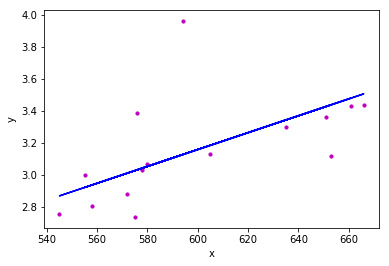

In [2]:
# Datasets for x and y 
LSAT=np.array([576, 635, 558, 578, 666, 580, 555, 661, 651, 605, 653, 575, 545, 572, 594]) # LSAT data
GPA=np.array([3.39, 3.30, 2.81, 3.03, 3.44, 3.07, 3.00, 3.43, 3.36, 3.13, 3.12, 2.74, 2.76, 2.88, 3.96]) # GPA data

SimpleLinearRegression(LSAT,GPA)


We can look at the residuals of the fitted line as follows.

<input>:6: DeprecationWarning: invalid escape sequence \e
<input>:6: DeprecationWarning: invalid escape sequence \e
<input>:6: DeprecationWarning: invalid escape sequence \e
<input>:6: DeprecationWarning: invalid escape sequence \e
<ipython-input-3-8a46c565a343>:6: DeprecationWarning: invalid escape sequence \e
  plt.ylabel('$\epsilon_i$')


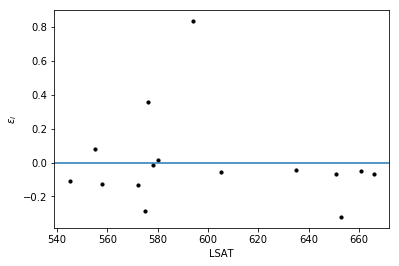

In [3]:
predictedGPA = -0.000193932215061 + 0.00526687127757*LSAT
residuals = GPA - predictedGPA
plt.scatter(LSAT, residuals, color = "k",marker = "o", s = 10) 
plt.axhline()
# putting generic labels for x and y axis
plt.ylabel('$\epsilon_i$') 
plt.xlabel('LSAT') # draw a y=0 line
plt.show()
# in general we want residuals to be Normally distributes about 0 with the same variance

### Residual Analysis

Looking at the residuals $\epsilon_i$'s in the above plot we can notice how just $4$ of the $15$ datapoints are abov $0$. If $\epsilon_i$ were truly IID $Normal(0,\sigma^2)$, we would expect roughly the same number of points to be spread above and below zero, i.e., the $x$-axis, in an equally likely manner. Also, we would expect more points to be closer to zero and fewer points to be further away.

In conclusion, the residuals of the linear regression of LSAT and GPA do not look like they are normall distributed.

We could try different approaches to improve the model. For example, we could try to increase the sample size or standardise the scales by subtracting the sample mean and dividing by the the sample standard deviation for the $x$ and $y$ values separately and doing regression with the standardised data, etc.

The [real wiki](http://reliawiki.org/index.php/Simple_Linear_Regression_Analysis) page has some simple examples of residual plots and they are useful for insights:

> Examples of residual plots are shown in the following figure. (a) is a satisfactory plot with the residuals falling in a horizontal band with no systematic pattern. Such a plot indicates an appropriate regression model. (b) shows residuals falling in a funnel shape. Such a plot indicates increase in variance of residuals and the assumption of constant variance is violated here. Transformation on  may be helpful in this case (see Transformations). If the residuals follow the pattern of (c) or (d), then this is an indication that the linear regression model is not adequate. Addition of higher order terms to the regression model or transformation on  or  may be required in such cases. A plot of residuals may also show a pattern as seen in (e), indicating that the residuals increase (or decrease) as the run order sequence or time progresses. This may be due to factors such as operator-learning or instrument-creep and should be investigated further.)

<img src="http://reliawiki.org/images/e/ee/Doe4.13.png">

We can finally obtain 95% confidence intervals for the fitted parameters in the simple linear regression model and do a Wald test as follows.

In [6]:
b0_hat, b1_hat, s_hat = estimate_coefficients(LSAT,GPA)
se_b0,se_b1 = standard_errors(LSAT,GPA)
print ("Estimated standard errors for beta_0_hat and beta_1_hat are:")
print (se_b0,se_b1 )
print ("and the approximate 95% confidence intervals for beta_0_hat is:")
print ("          [ ", b0_hat-2*se_b0," , ", b0_hat+2*se_b0, " ]")
print ("and the approximate 95% confidence intervals for beta_1_hat is:")
print ("          [ ", b1_hat-2*se_b1," , ", b1_hat+2*se_b1, " ]")
print ("The Wald test for the null hypothesis H0 that beta_1 = 0 is:")
W = (b1_hat-0)/se_b1
if abs(W > 2):
    print ("Reject H0 that beta_1=0 at alpha=0.05, since W = ",W)
else:
    print ("fail to reject H0 that beta_1=0 at alpha=0.05, since W = ",W)

Estimated standard errors for beta_0_hat and beta_1_hat are:
1.1054305503607234 0.0018374136245919459
and the approximate 95% confidence intervals for beta_0_hat is:
          [  -2.2110550329365077  ,  2.2106671685063857  ]
and the approximate 95% confidence intervals for beta_1_hat is:
          [  0.0015920440283845134  ,  0.008941698526752296  ]
The Wald test for the null hypothesis H0 that beta_1 = 0 is:
Reject H0 that beta_1=0 at alpha=0.05, since W =  2.8664592485200906


# Multiple Regression
### This is just as simple, except we have more than one covariate

Now, let's suppose that the covariate, feature, predictor or dependent variable is a vector of length $k$. So our data for regression is of the following form:

$$
(Y_1,X_1), (Y_2,X_2), \ldots, (Y_i,X_i), \ldots, (Y_n,X_n)
$$

where, $X_i$ is a vector of length $k$ for the $i$-th observation or datapoint $(Y_i,X_i)$. 

$$
X_i = (X_{i,1},X_{i,2},\ldots,X_{i,k}) \, .
$$

Then the linear regression model is:

$$
Y_i = \displaystyle{\sum_{j=0}^k \beta_j X_{i,j} + \epsilon_i, \quad \text{ for } i \in \{1,2,\ldots,n\} }
$$

where $\beta_0$ is the intercept term with $X_{i,0}=1$ for each $i \in \{1,2,\ldots,n\}$ and

$$
E \left( \epsilon_i | X_{1,i}, X_{2,i}, \ldots, X_{k,i} \right) = 0.
$$

We can denote the model using matrices and vectors more conveniently as follows:

$$
Y 
= \displaystyle{\left( {\begin{array}{c}
   Y_1 \\
   Y_2 \\
   \vdots \\
   Y_n
  \end{array} } \right)} \, ,
\qquad 
X 
=  \displaystyle{\left( {\begin{array}{cccc}
   1& X_{1,1}& \ldots& X_{1,k} \\
   1& X_{2,1}& \ldots& X_{2,k} \\
   \vdots & \vdots & \vdots & \vdots\\
   1& X_{n,1}& \ldots& X_{n,k} 
  \end{array} } \right)} \, ,
\qquad
\beta 
= \displaystyle{\left( {\begin{array}{c}
   \beta_0 \\
   \beta_1 \\
   \vdots \\
   \beta_k
  \end{array} } \right)} \, ,
\qquad 
\epsilon 
= \displaystyle{\left( {\begin{array}{c}
   \epsilon_1 \\
   \epsilon_2 \\
   \vdots \\
   \epsilon_n
  \end{array} } \right)} \, .
$$

With $X \in \mathbb{R}^{n \times (k+1)}$, i.e., $X$ being a $n \times (k+1)$ matrix, $\beta \in \mathbb{R}^{(k+1) \times 1}$, i.e., $\beta$ being a a column vector with $k+1$ rows, and $\epsilon \in \mathbb{R}^{n \times 1}$, i.e., $\epsilon$ being a column vector with $n$ rows, we obtain the multiple regression model:

$$
\boxed{
Y = X \beta + \epsilon \, .
}
$$

Just as in the 1D case with $k=1$, the least sqaures estimate is as follows, under the assumption that $X^T X$ is invertible:

$$
\boxed{
\begin{align}
\widehat{\beta} &= \left( X^T X\right)^{-1} X^T Y\\
V\left(\widehat{\beta} | X_{1:n} \right) &= \sigma^2 \left( X^T X \right)^{-1} \\
\widehat{\beta} &\approx Normal \left(\beta, \sigma^2 \left( X^T X\right)^{-1} \right)
\end{align} \, .
}
$$

The estimate of the regression function is:

$$
\boxed{
\widehat{r}(x) = \sum_{j=0}^k \widehat{\beta}_j \, x_j \, .
}
$$

An unbiased estimate of $\sigma^2$ is:

$$
\widehat{\sigma}^2 = \left( \frac{1}{n-k} \right) \sum_{i=1}^n \widehat{\epsilon}_i^2 \, 
$$

where $\widehat{\epsilon}$ is the vector of residuals:

$$
\boxed{
\widehat{\epsilon}=X \widehat{\beta} - Y
} \ , \text{ i.e.,} \quad
\widehat{\epsilon}  = \displaystyle{\left( {\begin{array}{c}
   \widehat{\epsilon}_1 \\
   \widehat{\epsilon}_2 \\
   \vdots \\
   \widehat{\epsilon}_n
  \end{array} } \right)} = \displaystyle{\left( {\begin{array}{cccc}
   1& X_{1,1}& \ldots& X_{1,k} \\
   1& X_{2,1}& \ldots& X_{2,k} \\
   \vdots & \vdots & \vdots & \vdots\\
   1& X_{n,1}& \ldots& X_{n,k} 
  \end{array} } \right)} \ 
  \displaystyle{\left( {\begin{array}{c}
   \widehat{\beta}_0 \\
   \widehat{\beta}_1 \\
   \vdots \\
   \widehat{\beta}_k
  \end{array} } \right)} \ - \displaystyle{\left( {\begin{array}{c}
   Y_1 \\
   Y_2 \\
   \vdots \\
   Y_n
  \end{array} } \right)}
$$

An approximate $1-\alpha$ confidence interval for $\beta_j$ is

$$
\boxed{
\widehat{\beta}_j \pm z_{\alpha/2} \widehat{se}(\widehat{\beta}_j)
}
$$
where $\left(\widehat{se}(\widehat{\beta}_j)\right)^2$ is the $j$-th diagonal entry of the matrix  $\widehat{\sigma}^2 (X^T X)^{-1}$.

## Solving Least Squares Using Numerical Linear Algebra Routine in scipy

We can use [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html#scipy.linalg.lstsq) to get the least squares solution to our regression problems quite easily, including generalisation to multiple linear regression when the covariates are in more than 1 dimension.

Let us try to understand the code in the previous cell by learning how to do a least squares fit by setting up the right design matrix.

### Example 1: Fitting a Line is Simple Linear Regression

In [7]:
from scipy.linalg import lstsq
import matplotlib.pyplot as plt
import numpy as np

# suppose we have the following data
x = np.array([1, 2.5, 3.5, 4, 5, 7, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

#We want to fit a line of the form y = a + b*x to this data. We first form the 
#“design matrix” M, with a constant column of 1s and a column containing x
M1 = x[:, np.newaxis]^[0, 1]
M1

array([[1. , 1. ],
       [1. , 2.5],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5. ],
       [1. , 7. ],
       [1. , 8.5]])

In [8]:
#We want to find the least-squares solution to 
#M1.dot(p) = y, where p is a vector with length 2 that holds the parameters a and b.
p, res, rnk, s = lstsq(M1, y)
p

array([-1.93080357,  1.16875   ])

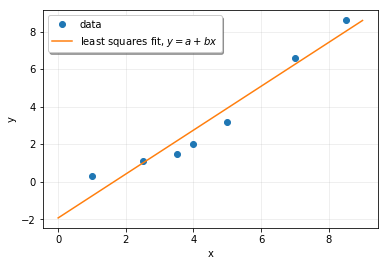

In [9]:
plt.plot(x, y, 'o', label='data')
xx = np.linspace(0, 9, 101)
yy = p[0] + p[1]*xx
plt.plot(xx, yy, label='least squares fit, $y = a + bx$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

### Example 2: Fitting a Quadratic is also Simple Linear Regresssion
Suppose we want to fit a quadratic polynomial of the form $y = a + b*x^2$ to the same data. 
Then we first form the design matrix `M2`, with a constant column of `1`s and a column containing `x^2` as follows:

In [10]:
M2 = x[:, np.newaxis]^[0, 2]
M2

array([[ 1.  ,  1.  ],
       [ 1.  ,  6.25],
       [ 1.  , 12.25],
       [ 1.  , 16.  ],
       [ 1.  , 25.  ],
       [ 1.  , 49.  ],
       [ 1.  , 72.25]])

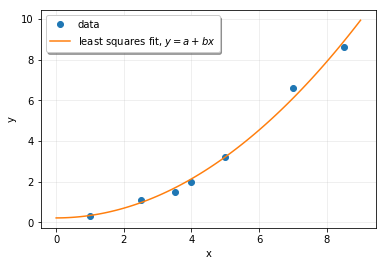

In [11]:
# least square solution with M2
p, res, rnk, s = lstsq(M2, y)
plt.plot(x, y, 'o', label='data')
xx = np.linspace(0, 9, 101)
yy = p[0] + p[1]*xx^2
plt.plot(xx, yy, label='least squares fit, $y = a + bx$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

### Example 3: Fitting a 3rd Order Polynomial is Multiple Linear Regresssion
Suppose we want to fit a degree-3 polynomial of the form $y = \beta_0 + \beta_1 x + \beta_2 x^2+ \beta_3 x^3$ to the same data. 
Then we first form the design matrix `M3`, with a constant column of `1`s with `x^0` and three additional columns containing `x^1`, `x^2` and `x^3` as follows:

In [12]:
# Fitting a cubic polynolial is the same idea
M3 = x[:, np.newaxis]^[0, 1, 2, 3]
M3

array([[  1.   ,   1.   ,   1.   ,   1.   ],
       [  1.   ,   2.5  ,   6.25 ,  15.625],
       [  1.   ,   3.5  ,  12.25 ,  42.875],
       [  1.   ,   4.   ,  16.   ,  64.   ],
       [  1.   ,   5.   ,  25.   , 125.   ],
       [  1.   ,   7.   ,  49.   , 343.   ],
       [  1.   ,   8.5  ,  72.25 , 614.125]])

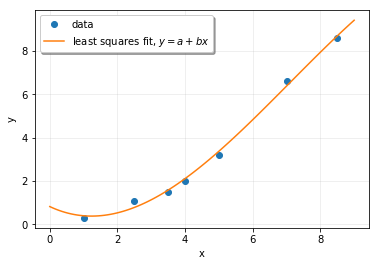

In [13]:
p, res, rnk, s = lstsq(M3, y)
plt.plot(x, y, 'o', label='data')
xx = np.linspace(0, 9, 101)
yy = p[0] + p[1]*xx + p[2]*xx^2 + p[3]*xx^3
plt.plot(xx, yy, label='least squares fit, $y = a + bx$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.show()

# Sample Exam Problem 8

Using the `lstsq` method shown above, and data arrays `x` and `y` in the next cell that contain log light intensity and log surface temperature in a give range of measurements from nearby stars, compute the least squares estimates of $\beta_0$ and $\beta_1$ under the simple linear regression model with an intercept and a slope term. Make a plot similar to the one above with the data points and the fitted regression line.

In [14]:
# Sample Exam Problem 8 
# do not change this import and data block ########################
from scipy.linalg import lstsq
import matplotlib.pyplot as plt
import numpy as np
logLightIntens_logSurfTemp=[(4.37,5.23),(4.56,5.74),
(4.26,4.93),(4.56,5.74),(4.30,5.19),(4.46,5.46),(3.84,4.65),(4.57,5.27),(4.26,5.57),(4.37,5.12),(3.49,5.73),
(4.43,5.45),(4.48,5.42),(4.01,4.05),(4.29,4.26),(4.42,4.58),(4.23,3.94),(4.42,4.18),(4.23,4.18),(3.49,5.89),
(4.29,4.38),(4.29,4.22),(4.42,4.42),(4.49,4.85),(4.38,5.02),(4.42,4.66),(4.29,4.66),(4.38,4.90),(4.22,4.39),
(3.48,6.05),(4.38,4.42),(4.56,5.10),(4.45,5.22),(3.49,6.29),(4.23,4.34),(4.62,5.62),(4.53,5.10),(4.45,5.22),
(4.53,5.18),(4.43,5.57),(4.38,4.62),(4.45,5.06),(4.50,5.34),(4.45,5.34),(4.55,5.54),(4.45,4.98),(4.42,4.50)]
CleanedlogLightIntens_logSurfTemp=\
np.array([yx for yx in logLightIntens_logSurfTemp if yx[1]<5.9 and yx[0]>4]) # data range constraint
x=CleanedlogLightIntens_logSurfTemp[:,1]
y=CleanedlogLightIntens_logSurfTemp[:,0]
########### end of import and data block ##########################

# Replace only ZZZ by the right values
M1 = ZZZ # design matrix M1
b, res, rnk, s = lstsq(ZZZ,ZZZ)
plt.plot(x, y, 'o', label='data')
xx = np.linspace(ZZZ, ZZZ, 101)
yy = ZZZ *xx
plt.plot(xx, yy, label='least squares fit')
plt.xlabel('log light intensity (X)')
plt.ylabel('log surface temperature (Y)')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.text(4, 4.7, r'$\widehat{r}(x) = \widehat{\beta}_0 + \widehat{\beta}_1 x, \quad \
\widehat{\beta}_0 = $ %(b0)0.3f , $\widehat{\beta}_1 = $ %(b1)0.3f' % {'b0': b[0], 'b1': b[1]} )
plt.show()

NameError: name 'ZZZ' is not defined

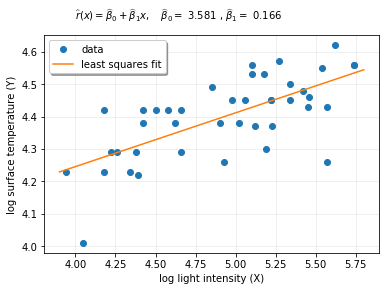

In [15]:
# Sample Exam Problem 8 Solution
logLightIntens_logSurfTemp=[(4.37,5.23),(4.56,5.74),
(4.26,4.93),(4.56,5.74),(4.30,5.19),(4.46,5.46),(3.84,4.65),(4.57,5.27),(4.26,5.57),(4.37,5.12),(3.49,5.73),
(4.43,5.45),(4.48,5.42),(4.01,4.05),(4.29,4.26),(4.42,4.58),(4.23,3.94),(4.42,4.18),(4.23,4.18),(3.49,5.89),
(4.29,4.38),(4.29,4.22),(4.42,4.42),(4.49,4.85),(4.38,5.02),(4.42,4.66),(4.29,4.66),(4.38,4.90),(4.22,4.39),
(3.48,6.05),(4.38,4.42),(4.56,5.10),(4.45,5.22),(3.49,6.29),(4.23,4.34),(4.62,5.62),(4.53,5.10),(4.45,5.22),
(4.53,5.18),(4.43,5.57),(4.38,4.62),(4.45,5.06),(4.50,5.34),(4.45,5.34),(4.55,5.54),(4.45,4.98),(4.42,4.50)]
CleanedlogLightIntens_logSurfTemp=\
np.array([yx for yx in logLightIntens_logSurfTemp if yx[1]<5.9 and yx[0]>4]) # data range constraint
x=CleanedlogLightIntens_logSurfTemp[:,1]
y=CleanedlogLightIntens_logSurfTemp[:,0]

from scipy.linalg import lstsq
import matplotlib.pyplot as plt
import numpy as np
M1 = x[:, np.newaxis]^[0, 1]
b, res, rnk, s = lstsq(M1, y)
plt.plot(x, y, 'o', label='data')
xx = np.linspace(3.9, 5.8, 101)
yy = b[0] + b[1]*xx
plt.plot(xx, yy, label='least squares fit')
plt.xlabel('log light intensity (X)')
plt.ylabel('log surface temperature (Y)')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.25)
plt.text(4, 4.7, r'$\widehat{r}(x) = \widehat{\beta}_0 + \widehat{\beta}_1 x, \quad \
\widehat{\beta}_0 = $ %(b0)0.3f , $\widehat{\beta}_1 = $ %(b1)0.3f' % {'b0': b[0], 'b1': b[1]} )
plt.show()

# Prediction

Let's consider the 1D setting for simplicity of notation. 
Suppose we have estimated a regression model:
$$\widehat{r}(x) = \widehat{\beta}_0 + \widehat{\beta}_1 x $$
from data $(X_1,Y_1), (X_2,Y_2), \ldots, (X_n,Y_n)$.

Now suppose we observe the value $X=x_*$ of the covariate of a new observarion but *do not* observe the response $Y_*$ and want to **predict** it. An estimate of $Y_*$ is

$$
\boxed{
\widehat{Y}_* = \widehat{\beta}_0 + \widehat{\beta}_1 x_* \, .
}
$$

By the formula for the variance of the sum of two random variables:

$$
V(\widehat{Y}_*) = V(\widehat{\beta}_0 + \widehat{\beta}_1 x_*) 
= V(\widehat{\beta}_0) + x_*^2 V(\widehat{\beta}_1 ) + 2 x_* Cov (\widehat{\beta}_0,\widehat{\beta}_1)
$$

We have all the needed terms to compute $V(\widehat{Y}_*)$ from the earlier result on the conditional variance of the least squares estimate:

$$
V \left( \widehat{\beta} \, | \, X_{1:n} \right) 
= \frac{\sigma^2}{n s_X^2} 
\left( 
{\begin{array}{cc}
   \frac{1}{n}\sum_{i=1}^n X_i^2 & -\overline{X}_n \\
   -\overline{X}_n & 1\\
  \end{array}} 
  \right)
$$

The estimated standard error $\widehat{se}(\widehat{Y}_*)$ is just $\sqrt{V(\widehat{Y}_*)}$ with $\widehat{\sigma}^2$ substituted in for $\sigma^2$. An approximate $1-alpha$ confidence interval for $Y^*$ is called an **approximate $1-\alpha$ prediction interval for $Y_*$** and is given by

$$
\boxed{
\widehat{Y}_* \pm z_{\alpha/2} \widehat{\xi}_n \, , \quad \text{ where } \quad 
\widehat{\xi}^2_n = \widehat{\sigma}^2 \left( \frac{\sum_{i=1}^n (X_i-X_*)^2}{n \sum_{i=1}^n (X_i-\overline{X})^2} + 1 \right)
}
$$

# Multiple Regression on 2018 Swedish Election Data

If you are interested, you already have the basic skills to look at the data from Swedish election using these ideas.

Try to model, say the $\log$ of the number of district-level votes for the top two most voted parties.

You can introduce latitude of the district centres (if you have such information from geospatial database you could join), distance of the district to one of the four largest cities in Sweden, or the socio-economic indicators of the district for Swedish Central Statistical Bureau, etc., as covariates.

But this is a good project and beyond current scope (mainly due to time limitations).

# Prelude to Statistical Machine Learning

Here, we just start you off on the path to more statistical modeling for purposes of prediction.
Now statistical learning from the 1970s is needed to mathematically justify the methods.

The following is a teaser of what you will see in the first couple weeks of you course in 'statistical machine learning'.

## Loss functions and gradient descent

[this header was adapted from some notes by Benny Avelin]

In the above example with linear regression we wanted to minimize the vertical distance between the fitted line and the data, this vertical distance is a prime example of a **loss function**. In general when we are faced with a regression problem we want a way of measure how good our model is, this quantity that we want to *minimise* is called the loss function and its expectation (over different sample data-points is called the **risk**). The mathematical statistical justification for this approach towards minimising expected loss or risk is called [empirical risk minimisation](https://en.wikipedia.org/wiki/Empirical_risk_minimization), as we will see in the sequel in more detail.

Let us circle back to linear regression once again. The way the `np.argmin` method searched for the minimum of:

$$L(a,b) = \sum_{i=1}^N (y_i - f_{a,b}(x_i))^2$$

was by simply evaluating $L(a,b)$ for each value of $a$ in the array `prop_a` with our guessed values for $a$ and picking the $a$ that minimised $L(a,b)$. Recall we fixed $b$ in the search.

> np.argmin? # see the docstring for np.argmin and other functions/methods we are using throughout if you need to know right away.

This approaching of evaluating the loss at a set of parameter values quickly becomes infeasible when the dimension of the problem is larger than $1$. 

Even if we just have two guess for each dimension of the parameter space with $d$ dimensions, then we will need to evaluate the loss at $2^d$ parameter values. When $d=10,100,1000$ the number of evaluation points become $1024$, $1.268e30, 1.072e301$, respectively.

Often in big-data settings, the number of dimensions for the regression problem can easily extend over a few thousands. 
Thus, we need a systematic way to find the optimal parameters, i.e., the parameters that minimise the loss function.

The iterative solution is called **gradient descent** and it goes like this: 

- *Initialise:* Let us start with some initial parameters, say in our linear regression example $(a,b) = (0,0)$, say at iteration $i=0$.
- *Update:* then we construct an update rule like the following to update the parameter values at $i+1$ from those at iteration $i$:
  - $a_i = a_{i-1}-l \frac{dL}{da}(a_{i-1},b_{i-1})$
  - $b_i = b_{i-1}-l \frac{dL}{db}(a_{i-1},b_{i-1}) $
  - where $l > 0$ is called the learning rate.
- *Stop:* Finally we stop when a stopping rule like the following is satisfied:
$$\sqrt( ( L(a_{i+1},b_{i+1})- L(a_{i},b_{i}))^2) < \tau, \qquad \text{ where, $\tau$ is some tolerance threshold that says we are close enough to the minimum value found by our iteration}.$$


# Introduction to R in SageMath Jupyter IPython Notebook

1. How to run R commands in SageMath
  * doing linear regression regression using R's builtin `lm` (linear model) package in SageMath/R
  * installing non-builtin packages, loading libraries and data

## Running R in SageMath is "easy as":

- Use `%%r` to denote that the `Code` cell is of language `R`

First note that SageMath/Python and R kernels will be available in the SageMath Jupyter notebook.

In [20]:
# this is x and y available as numpy arrays in SageMath/Python
logLightIntens_logSurfTemp=[(4.37,5.23),(4.56,5.74),
(4.26,4.93),(4.56,5.74),(4.30,5.19),(4.46,5.46),(3.84,4.65),(4.57,5.27),(4.26,5.57),(4.37,5.12),(3.49,5.73),
(4.43,5.45),(4.48,5.42),(4.01,4.05),(4.29,4.26),(4.42,4.58),(4.23,3.94),(4.42,4.18),(4.23,4.18),(3.49,5.89),
(4.29,4.38),(4.29,4.22),(4.42,4.42),(4.49,4.85),(4.38,5.02),(4.42,4.66),(4.29,4.66),(4.38,4.90),(4.22,4.39),
(3.48,6.05),(4.38,4.42),(4.56,5.10),(4.45,5.22),(3.49,6.29),(4.23,4.34),(4.62,5.62),(4.53,5.10),(4.45,5.22),
(4.53,5.18),(4.43,5.57),(4.38,4.62),(4.45,5.06),(4.50,5.34),(4.45,5.34),(4.55,5.54),(4.45,4.98),(4.42,4.50)]
CleanedlogLightIntens_logSurfTemp=\
np.array([yx for yx in logLightIntens_logSurfTemp if yx[1]<5.9 and yx[0]>4]) # data range constraint
x=CleanedlogLightIntens_logSurfTemp[:,1]
y=CleanedlogLightIntens_logSurfTemp[:,0]
print (x)
print (y)

[5.23 5.74 4.93 5.74 5.19 5.46 5.27 5.57 5.12 5.45 5.42 4.05 4.26 4.58
 3.94 4.18 4.18 4.38 4.22 4.42 4.85 5.02 4.66 4.66 4.9  4.39 4.42 5.1
 5.22 4.34 5.62 5.1  5.22 5.18 5.57 4.62 5.06 5.34 5.34 5.54 4.98 4.5 ]
[4.37 4.56 4.26 4.56 4.3  4.46 4.57 4.26 4.37 4.43 4.48 4.01 4.29 4.42
 4.23 4.42 4.23 4.29 4.29 4.42 4.49 4.38 4.42 4.29 4.38 4.22 4.38 4.56
 4.45 4.23 4.62 4.53 4.45 4.53 4.43 4.38 4.45 4.5  4.45 4.55 4.45 4.42]


### Assigning to `x` and `y` in SageMath/R

We use the assignment operator, `<-`, in R, as follows:

In [21]:
%%r
x <- c(5.23,  5.74,  4.93,  5.74,  5.19,  5.46,  5.27,  5.57,  5.12,
         5.45,  5.42,  4.05,  4.26,  4.58,  3.94,  4.18,  4.18,  4.38,
         4.22,  4.42,  4.85,  5.02,  4.66,  4.66,  4.9 ,  4.39,  4.42,
         5.1 ,  5.22,  4.34,  5.62,  5.1 ,  5.22,  5.18,  5.57,  4.62,
         5.06,  5.34,  5.34,  5.54,  4.98,  4.5)
y <- c(4.37,  4.56,  4.26,  4.56,  4.3 ,  4.46,  4.57,  4.26,  4.37,
         4.43,  4.48,  4.01,  4.29,  4.42,  4.23,  4.42,  4.23,  4.29,
         4.29,  4.42,  4.49,  4.38,  4.42,  4.29,  4.38,  4.22,  4.38,
         4.56,  4.45,  4.23,  4.62,  4.53,  4.45,  4.53,  4.43,  4.38,
         4.45,  4.5 ,  4.45,  4.55,  4.45,  4.42)

 [1] 4.37 4.56 4.26 4.56 4.30 4.46 4.57 4.26 4.37 4.43 4.48 4.01 4.29 4.42 4.23
[16] 4.42 4.23 4.29 4.29 4.42 4.49 4.38 4.42 4.29 4.38 4.22 4.38 4.56 4.45 4.23
[31] 4.62 4.53 4.45 4.53 4.43 4.38 4.45 4.50 4.45 4.55 4.45 4.42


### Doing Linear Regression in SameMath/R

In [22]:
%%r
linearRegressionModel <- lm(formula = y ~ x + I(x^2))

summary(linearRegressionModel)


Call:
lm(formula = y ~ x + I(x^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22916 -0.05145  0.01121  0.06263  0.16072 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.87480    1.44471   1.298    0.202
x            0.87443    0.59759   1.463    0.151
I(x^2)      -0.07272    0.06128  -1.187    0.243

Residual standard error: 0.09108 on 39 degrees of freedom
Multiple R-squared:  0.484,	Adjusted R-squared:  0.4576 
F-statistic: 18.29 on 2 and 39 DF,  p-value: 2.491e-06


## Running R in SageMath is "easy as":

Sometimes you need additional `R` packages.

- Installing R packages with `install.packages(...)`

**Note:** Once a package is installed on a particular machine using `install.packages("wantedpackage")` then you only need to load that library using `library(wantedpackage)` when you are using the same machine.

### Additional Packages

One often needs several additional packages to run certain desired `R` commands. Let's get some such packages.


In other words, you don't have to install packages that are already installed and thus can be automatically found by `R` in the default location it will be installed at. In the case below, you can see where the package was installed from the following line:

-  `Installing package into ‘/some_path_to_where_the_package_is_installed’`

In [23]:
%%r
# there will be further dependencies, you may need to recursively install...
#install.packages("Flury")
#library(Flury)
#data(dead.beetles)

<rpy2.rinterface_lib.sexp.NULLType object at 0x33b8d4aa0> [RTYPES.NILSXP]


## SageMath/R docs

For example, you can find in the docs more systematic/programmatic way to assign SageMath/Python objects to SageMath/R objects.

- R:
  - [https://cran.r-project.org/doc/manuals/R-intro.html](https://cran.r-project.org/doc/manuals/R-intro.html)
- SageMath/R:
  - [http://doc.sagemath.org/html/en/reference/interfaces/sage/interfaces/r.html](http://doc.sagemath.org/html/en/reference/interfaces/sage/interfaces/r.html)
